<a href="https://colab.research.google.com/github/clizarraga-UAD7/ML-Notebooks/blob/main/OutlierDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Outlier and data anomalies detection

## The Standard Deviation Method

If we know that the distribution of values ​​in the sample is Gaussian or Gaussian-like, then we can use the sample standard deviation as the threshold to determine outliers.



In [ ]:
# identify outliers with standard deviation

# seed the random number generator
np.random.seed(42)

# generate univariate observations
data = 5 * np.random.randn(1000) + 50

# calculate summary statistics
data_mean, data_std = np.mean(data), np.std(data)


In [ ]:
type(data)

numpy.ndarray

In [ ]:
print('data_mean = %.2f' % data_mean, ', data_std = %.2f' % data_std)


data_mean = 50.10 , data_std = 4.89


In [ ]:
# identify outliers 3 stad deviation above or below the arithmetic mean
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
print(outliers)


Identified outliers: 3
[69.26365745327361, 33.79366329965464, 65.3944040422762]


In [ ]:
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))


Non-outlier observations: 997


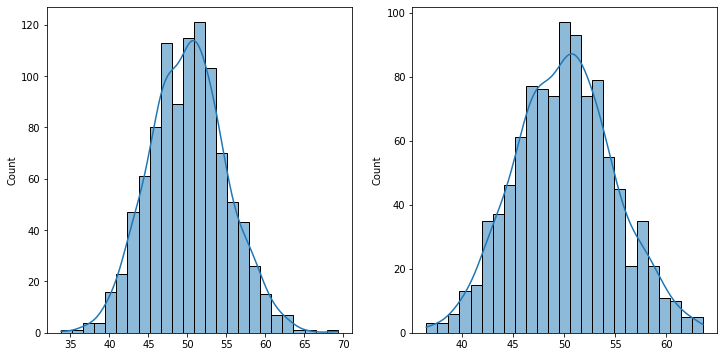

In [ ]:
# Plot bot datasets with and without outliers

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))

sns.histplot(data, bins=25, kde=True, ax=ax1);
sns.histplot(outliers_removed, bins=25, kde=True, ax=ax2);


## Interquartile Range Method

When we do not know the type of probability distribution of a dataset, or the data does not follow a Gaussian distribution.

Tukey gives a criteria for defining outlier data. If Q1, and Q3 are the first and third quartile positions, the interquartile range _IQR = Q3 - Q1_, then an outlier value will fall below _Q1 - 1.5 IQR_ or above _Q3 + 1.5 IQR_. These are called _Tukey inner fences_. 

We can further introduce _Tukey outer fences_ for determining values that fall ouside the limits _Q1 - 3.0 IQR_ or above _Q3 + 3.0 IQR_.

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Read the SOCR Weight & Height dataset from Github
filename = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/SOCR-HeightWeight.csv"
df = pd.read_csv(filename)
df.head()


,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [ ]:
# Rename columns
df.rename(columns={'Height(Inches)': 'height', 'Weight(Pounds)': 'weight'}, inplace=True)


In [ ]:
# Print the basic dataframe info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   25000 non-null  int64  
 1   height  25000 non-null  float64
 2   weight  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [ ]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    ifl, ifu = inner_fence_le, inner_fence_ue
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    ofl, ofu = outer_fence_le, outer_fence_ue
    
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss, ifl, ifu, ofl, ofu
 

In [ ]:
probable_outliers_tm, possible_outliers_tm, ifl, ifu, ofl, ofu = tukeys_method(df, "height")
print(len(probable_outliers_tm))
print(len(possible_outliers_tm))


0
167


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


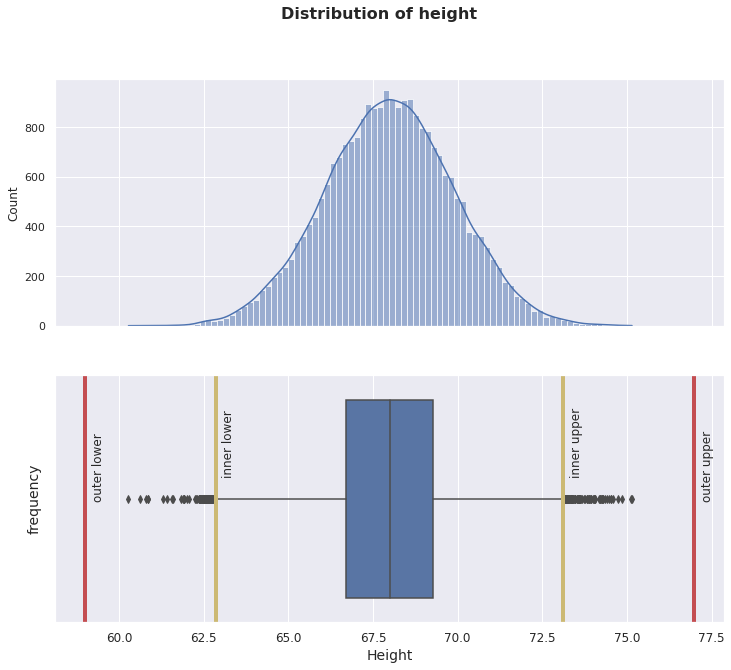

In [ ]:
# histogram and kernel density estimation function of the variable height
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex=True)
sns.set(rc={"figure.figsize":(12, 10)}) #width=3, #height=4

sns.histplot(df["height"], kde=True, ax=ax1);
sns.boxplot(df["height"], ax=ax2);

# notation indicating a possible outlier
#ax.annotate('Possible outlier', xy=(188,0.0030), xytext=(189,0.0070), fontsize=12,
#            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# ticks 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Tukey fences
plt.axvline(ifl, linewidth=4, color='y')
plt.text(ifl + 0.2,-0.1,'inner lower',rotation=90)
plt.axvline(ifu, linewidth=4, color='y')
plt.text(ifu + 0.2,-0.1,'inner upper',rotation=90)

plt.axvline(ofl, linewidth=4, color='r')
plt.text(ofl + 0.2,0,'outer lower',rotation=90)
plt.axvline(ofu, linewidth=4, color='r')
plt.text(ofu + 0.2,0,'outer upper',rotation=90)


# labels and title
plt.xlabel('Height', fontsize=14);
plt.ylabel('frequency', fontsize=14);
fig.suptitle('Distribution of height', fontweight='bold', size=16);



In [ ]:
probable_outliers_tm, possible_outliers_tm, ifl, ifu, ofl, ofu = tukeys_method(df, "weight")
print(len(probable_outliers_tm))
print(len(possible_outliers_tm))


0
191


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


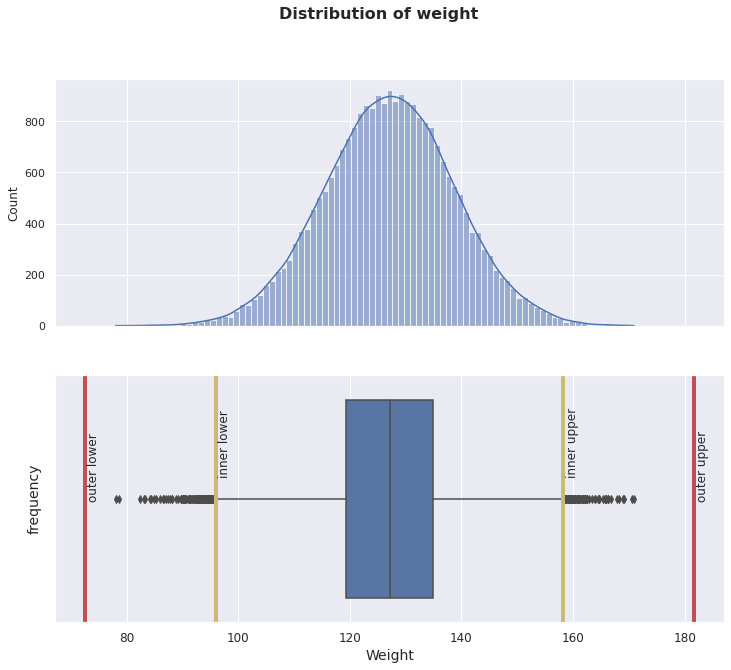

In [ ]:
# histogram and kernel density estimation function of the variable height
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex=True)
sns.set(rc={"figure.figsize":(12, 8)}) #width=3, #height=4

sns.histplot(df["weight"], kde=True, ax=ax1);
sns.boxplot(df["weight"], ax=ax2)

# notation indicating a possible outlier
#ax.annotate('Possible outlier', xy=(188,0.0030), xytext=(189,0.0070), fontsize=12,
#            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# ticks 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Tukey fences
plt.axvline(ifl, linewidth=4, color='y')
plt.text(ifl + 0.4,-0.1,'inner lower',rotation=90)
plt.axvline(ifu, linewidth=4, color='y')
plt.text(ifu + 0.4,-0.1,'inner upper',rotation=90)

plt.axvline(ofl, linewidth=4, color='r')
plt.text(ofl + 0.4,0,'outer lower',rotation=90)
plt.axvline(ofu, linewidth=4, color='r')
plt.text(ofu + 0.4,0,'outer upper',rotation=90)


# labels and title
plt.xlabel('Weight', fontsize=14);
plt.ylabel('frequency', fontsize=14);
fig.suptitle('Distribution of weight', fontweight='bold', size=16);


## Scatterplot of Weight vs. Height.


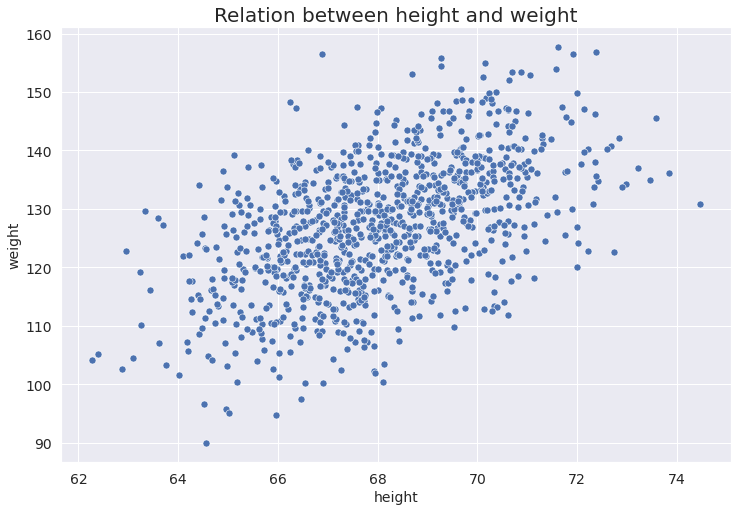

In [ ]:
# scatter plot
df0 = df.sample(1000)
ax = sns.scatterplot(x="height", y="weight", data=df0, s=50)

# notations indicating an outlier
#ax.annotate('Outlier', xy=(190,105), xytext=(183,102), fontsize=14,
#            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
#ax.annotate('Outlier', xy=(165,85), xytext=(158,82), fontsize=14,
#            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('height', fontsize=14)
plt.ylabel('weight', fontsize=14)
plt.title('Relation between height and weight', fontsize=20);



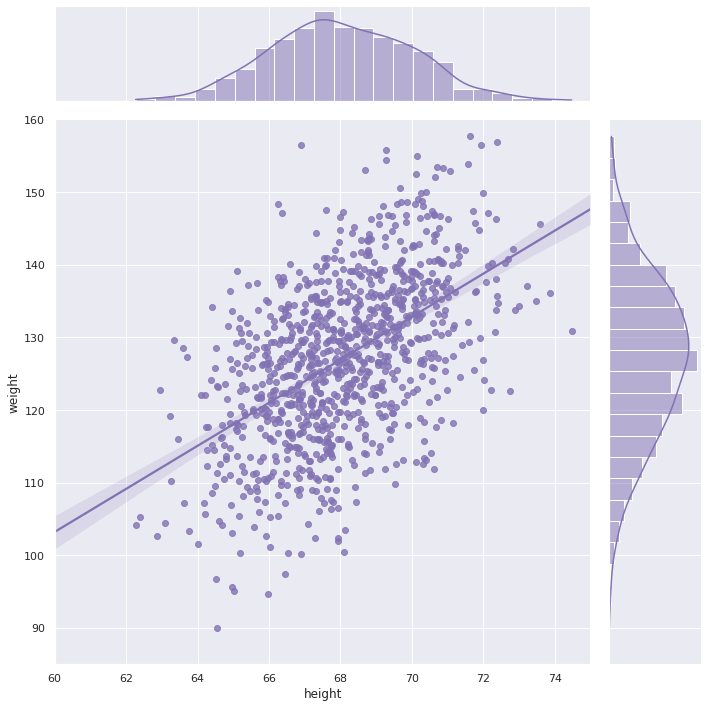

In [ ]:
sns.jointplot(x="height", y="weight", data=df0,
                  kind="reg", truncate=False,
                  xlim=(60, 75), ylim=(85, 160),
                  color="m", height=10);


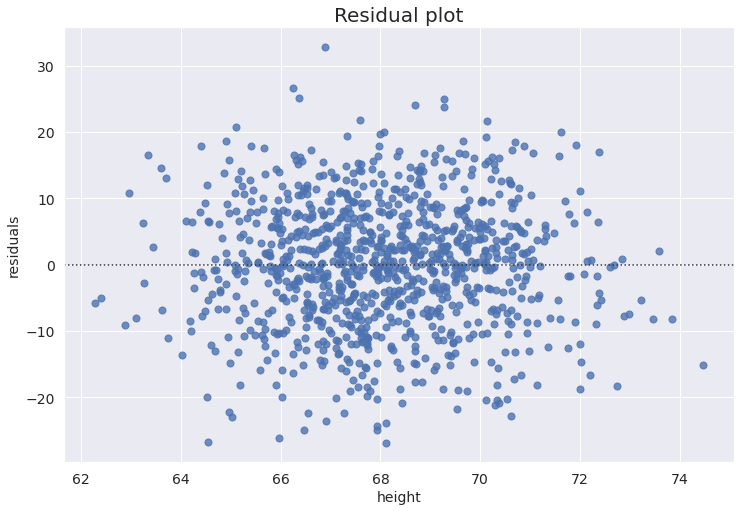

In [ ]:
# residual plot with seaborn library
sns.residplot(x="height", y="weight", data=df0, scatter_kws=dict(s=50))

# annotations indicating an outlier
#plt.annotate('Outlier', xy=(165,24), xytext=(168,22), fontsize=14,
#            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

#plt.annotate('Outlier', xy=(190,6), xytext=(183,4), fontsize=14,
#            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('height', fontsize=14)
plt.ylabel('residuals', fontsize=14)
plt.title('Residual plot', fontsize=20);



## Cook's distance

 In statistics, [Cook's distance](https://en.wikipedia.org/wiki/Cook%27s_distance), **Cook's D** is a commonly used estimate of the influence of a data point when performing a least-squares regression analysis. In a practical ordinary least squares analysis, Cook's distance can be used in several ways: to indicate influential data points that are particularly worth checking for validity; or to indicate regions of the design space where it would be good to be able to obtain more data points.

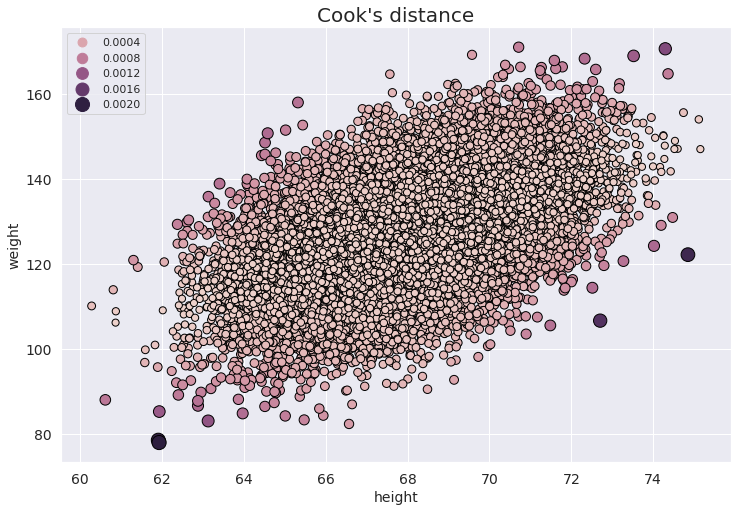

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence

# fit the regression model using statsmodels library 
f = 'weight ~ height'
model = ols(formula=f, data=df).fit()

# calculate the cooks_distance - the OLSInfluence object contains multiple influence measurements
cook_distance = OLSInfluence(model).cooks_distance
(distance, p_value) = cook_distance

# scatter plot - x axis (independent variable height), y-axis (dependent variable weight), size and color of the marks according to its cook's distance
sns.scatterplot(x="height", y="weight", data=df, hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('height', fontsize=14)
plt.ylabel('weight', fontsize=14)
plt.title('Cook\'s distance', fontsize=20);


<ipython-input-29-3db71e2e8ad1>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(distance, basefmt=" ");


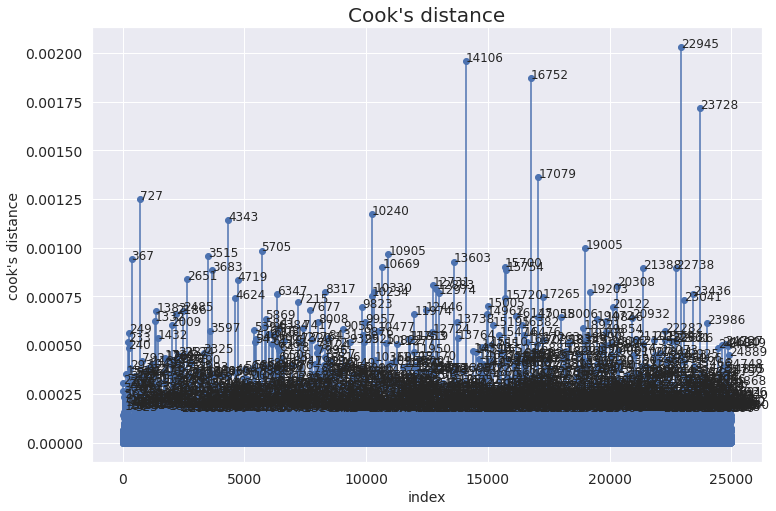

In [ ]:

sns.set(rc={"figure.figsize":(12, 8)})
sample_size = 25000
threshold = 4/sample_size

# stem plot - the x-axis represents the index of the observation and the y-axis its Cook's distance
plt.stem(distance, basefmt=" ");

# horizontal line showing the threshold value
plt.hlines(threshold, -2, sample_size + 1, 'r');

# the observations with Cook's distances higher than the threshold value are labeled in the plot
influencial_data = distance[distance > threshold]

for index, value in influencial_data.items():
    plt.text(index, value, str(index), fontsize=12);

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('index', fontsize=14)
plt.ylabel('cook\'s distance', fontsize=14)
plt.title('Cook\'s distance', fontsize=20);


## Isolation Forest

[Isolation Forest](https://en.wikipedia.org/wiki/Isolation_forest) detects anomalies using isolation (how far a data point is from the rest of the data). This method deviates from the mainstream philosophy that underpinned most existing anomaly detectors at the time. Instead of profiling all normal instances before anomalies are identified, Isolation Forest detects anomalies using binary trees. 

In [31]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
import pandas as pd

In [32]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df["benign"] = breast_cancer.target

In [33]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [34]:
# Will assume that malignant label is anomalous

majority_df = df[df["benign"] == 1]
minority_df = df[df["benign"] == 0]
minority_downsampled_df = resample(minority_df, replace=True, n_samples=30, random_state=42)
downsampled_df = pd.concat([majority_df, minority_downsampled_df])


In [35]:
# We will have more samples in the majority class than in the minority class

downsampled_df["benign"].value_counts()


1    357
0     30
Name: benign, dtype: int64

In [36]:
y = downsampled_df["benign"]
X = downsampled_df.drop("benign", axis=1)


In [37]:
# Split data between train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
# Define model, train it and make predictions

model = IsolationForest(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [39]:
y_pred

array([ 1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1])

In [40]:
# Redefine negative values to 0
y_pred[y_pred == -1] = 0

In [43]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[ 7,  2],
       [ 5, 83]])

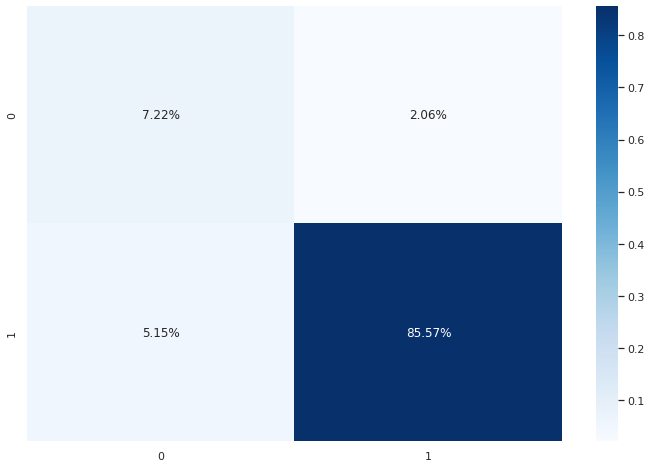

In [45]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues');


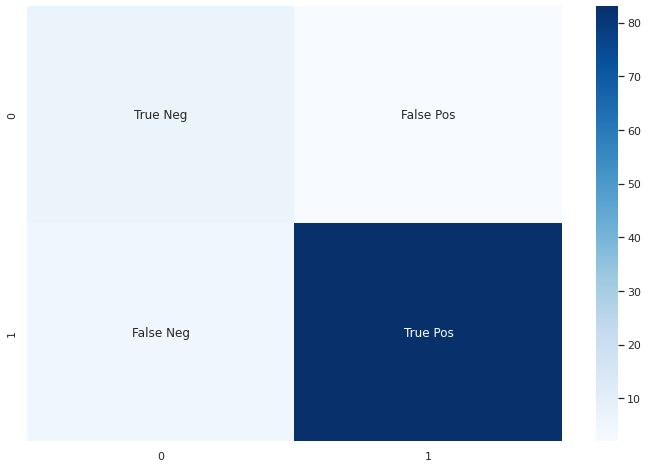

In [50]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

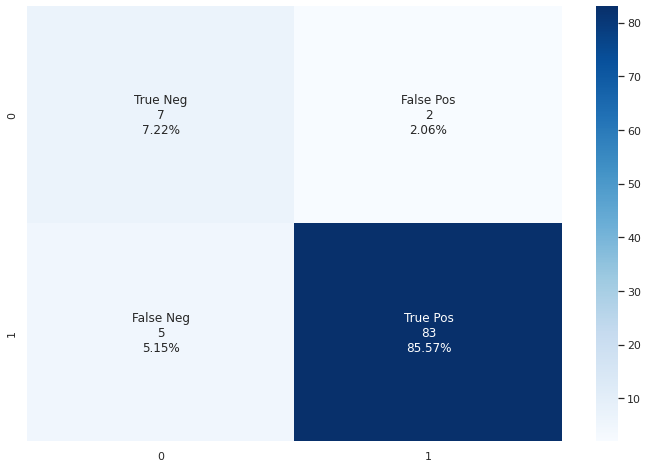

In [52]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
